In [147]:
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from scipy.stats import norm

In [ ]:
#TODO: Hacer que tambien rellene el area del histograma
#TODO Corregir ortografia
#TODO: Poner pie de figuras

In [148]:
path = os.getcwd()
path_datasets = path + "/datasets/"
path_img = path + "/img/"

# Funciones

In [149]:
def get_figures(data, nombre , rango = ['inf', 'inf'], path_save = path_img):
    media = data.mean()
    std = data.std()
    
    #data_normalizada = pd.DataFrame()
    #data_normalizada = (data - media) / std
    
    
    fig = plt.figure(figsize=(12, 8))
    gs = fig.add_gridspec(2, 3)  

    ax1 = fig.add_subplot(gs[0, :])  
    sns.histplot(data, kde=True, ax=ax1,stat='count',color='skyblue')
    ax1.set_ylabel('Cuenta')
    plt.legend(title=f'Media: {media:.4f} \n Desviación Estándar: {std:.4f}', loc='upper right')  

    ax2 = fig.add_subplot(gs[1, 0])  
    sns.boxplot(data, ax=ax2, color='lightgray')

    data_normalizada = np.random.normal(loc=0, scale=1, size=1000000)
    ax3 = fig.add_subplot(gs[1, 1:])  
    kde = sns.kdeplot(data_normalizada, ax=ax3, color='orange')
    x = kde.lines[0].get_xdata()
    y = kde.lines[0].get_ydata()
    prob = 1
    if(rango[0] != 'inf'):
        z_i = (rango[0] - media)/std
    if(rango[1] != 'inf'):
        z_f = (rango[1] - media)/std
    color_relleno = 'orange'
    if(rango[0] == 'inf' and rango[1] == 'inf'):
        ax3.fill(x, y, color = color_relleno)
    elif(rango[0] == 'inf' and rango[1] != 'inf'): # x <= Z
        prob = norm.cdf(z_f)
        ax3.fill_between(x, y, where=(x <= z_f), color=color_relleno, alpha=0.3)
    elif(rango[0] != 'inf' and rango[1] == 'inf'): # x x >=1
        prob = 1 - norm.cdf(z_i)
        ax3.fill_between(x, y, where=(x >= z_i), color=color_relleno, alpha=0.3)
    else:
        prob = norm.cdf(z_f) - norm.cdf(z_i)
        ax3.fill_between(x, y, where=(x >= z_i) & (x <= z_f), color=color_relleno, alpha=0.3)
        
    plt.legend(title = f'Probabilidad: {prob * 100: 0.4f}%')
    plt.tight_layout()
    
    
    plt.savefig(path_save + nombre +'.jpg')
    plt.show()

# Height Wight

In [150]:
nombre = 'HeightWeight'

In [151]:
HeightWeight = pd.read_csv(path_datasets + nombre + '.csv', index_col=0)

In [152]:
# Transformar data a sistema internacional
HeightWeight['Altura(cm)'] = HeightWeight['Height(Inches)'] * 2.54
HeightWeight['Peso(kg)'] = HeightWeight['Weight(Pounds)'] * 0.453592
HeightWeight.drop('Height(Inches)', axis = 1, inplace=True)
HeightWeight.drop('Weight(Pounds)', axis = 1, inplace=True)
HeightWeight

,Altura(cm),Peso(kg)
Index,,
1,167.089607,51.252494
2,181.648633,61.909547
3,176.272800,69.411778
4,173.270164,64.562199
5,172.181037,65.452010
...,...,...
24996,176.535461,53.538008
24997,163.952580,54.518674
24998,164.334317,53.644285


## Peso Experimento 1

/tmp/ipykernel_50154/27943055.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=f'Media: {media:.4f} \n Desviación Estándar: {std:.4f}', loc='upper right')
/tmp/ipykernel_50154/27943055.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title = f'Probabilidad: {prob * 100: 0.4f}%')


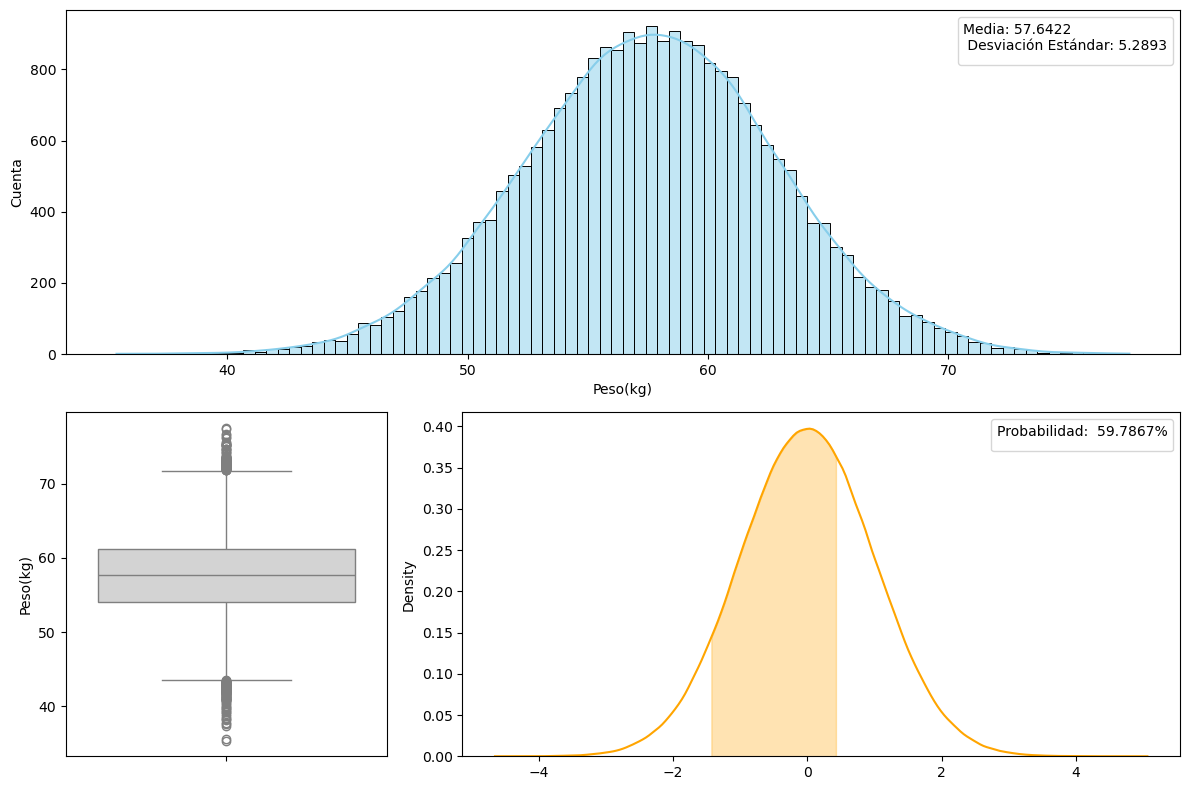

In [153]:
get_figures(HeightWeight['Peso(kg)'], nombre='1_Peso', rango = [50,60])

## Altura - experimento 2

/tmp/ipykernel_50154/27943055.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=f'Media: {media:.4f} \n Desviación Estándar: {std:.4f}', loc='upper right')
/tmp/ipykernel_50154/27943055.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title = f'Probabilidad: {prob * 100: 0.4f}%')


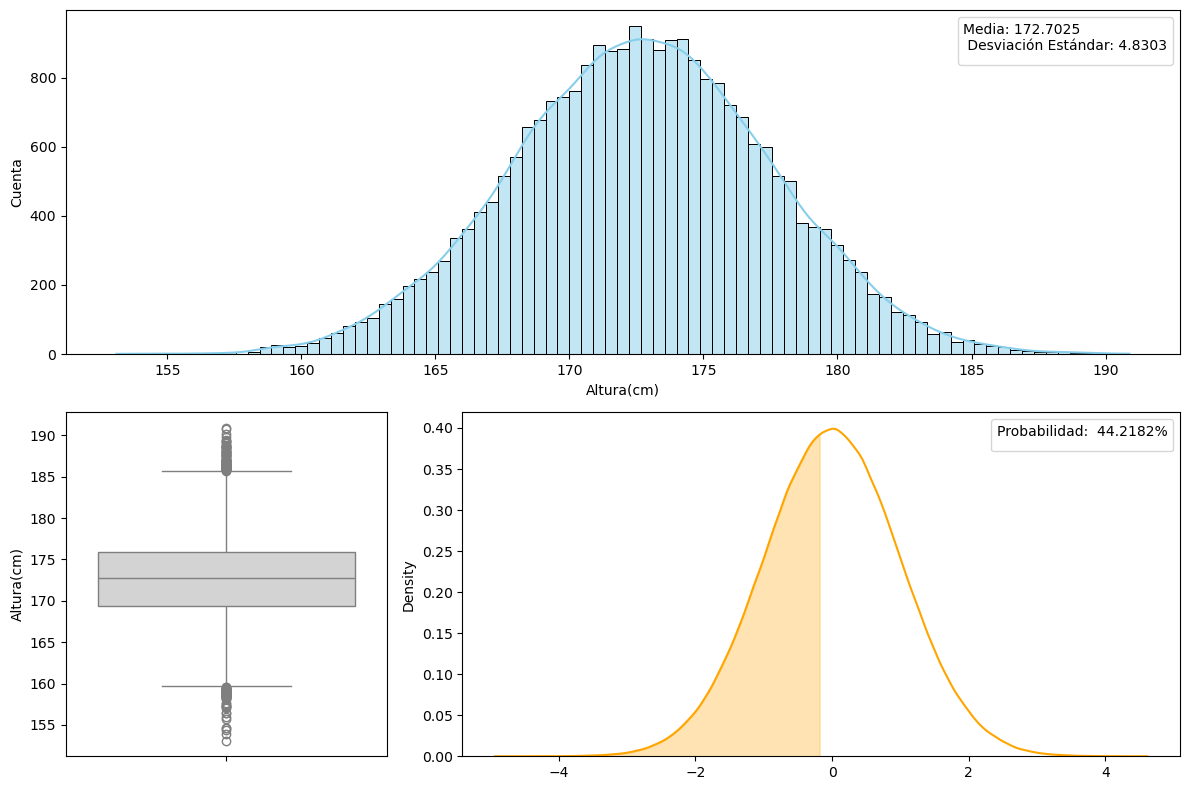

In [154]:
get_figures(HeightWeight['Altura(cm)'], nombre='2_Altura',rango=['inf', 172])

# Banana

In [155]:
nombre = 'banana_quality'
banana = pd.read_csv(path_datasets + nombre +'.csv', index_col= 0)
banana.rename(columns={'quality_score':'calificacion', 
                                'ripeness_index':'índice_madurez',
                                'length_cm':'largo(cm)', 'weight_g':'peso(g)', 
                                'tree_age_years':'edad_arbol(años)', 
                                'altitude_m': 'altitud(m)', 
                                'rainfall_mm':'lluvia(mm)', 
                                'soil_nitrogen_ppm':'nitrogeno_suelo(ppm)',
                                'sugar_content_brix': 'índice_Brix_azúcar',
                                'firmness_kgf':'firmeza(kgf)'}, inplace = True)

banana.drop(columns=['variety', 'region', 'quality_category', 'harvest_date','ripeness_category'], inplace = True)
banana

,calificacion,índice_madurez,índice_Brix_azúcar,firmeza(kgf),largo(cm),peso(g),edad_arbol(años),altitud(m),lluvia(mm),nitrogeno_suelo(ppm)
sample_id,,,,,,,,,,
1,1.88,2.11,16.83,3.53,21.44,146.92,13.7,58.2,2440.5,183.6
2,2.42,4.25,16.73,4.09,26.11,160.48,5.1,280.2,2374.6,109.8
3,3.57,6.24,21.34,1.63,25.20,225.27,17.7,1246.9,1191.5,147.7
4,2.21,5.39,16.75,3.31,13.08,137.80,13.0,1150.2,2845.1,92.8
5,2.35,5.84,16.90,3.07,12.98,227.84,4.8,526.0,2136.9,129.7
...,...,...,...,...,...,...,...,...,...,...
996,3.50,4.94,21.06,2.49,27.95,196.35,12.4,409.7,2029.9,173.0
997,2.38,6.74,16.10,2.00,12.39,165.55,14.0,314.3,1330.7,180.5
998,1.68,1.41,17.17,2.28,16.56,210.08,18.4,683.0,2955.4,189.9


## Calificacion de la banana - experimento 3

/tmp/ipykernel_50154/27943055.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=f'Media: {media:.4f} \n Desviación Estándar: {std:.4f}', loc='upper right')
/tmp/ipykernel_50154/27943055.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title = f'Probabilidad: {prob * 100: 0.4f}%')


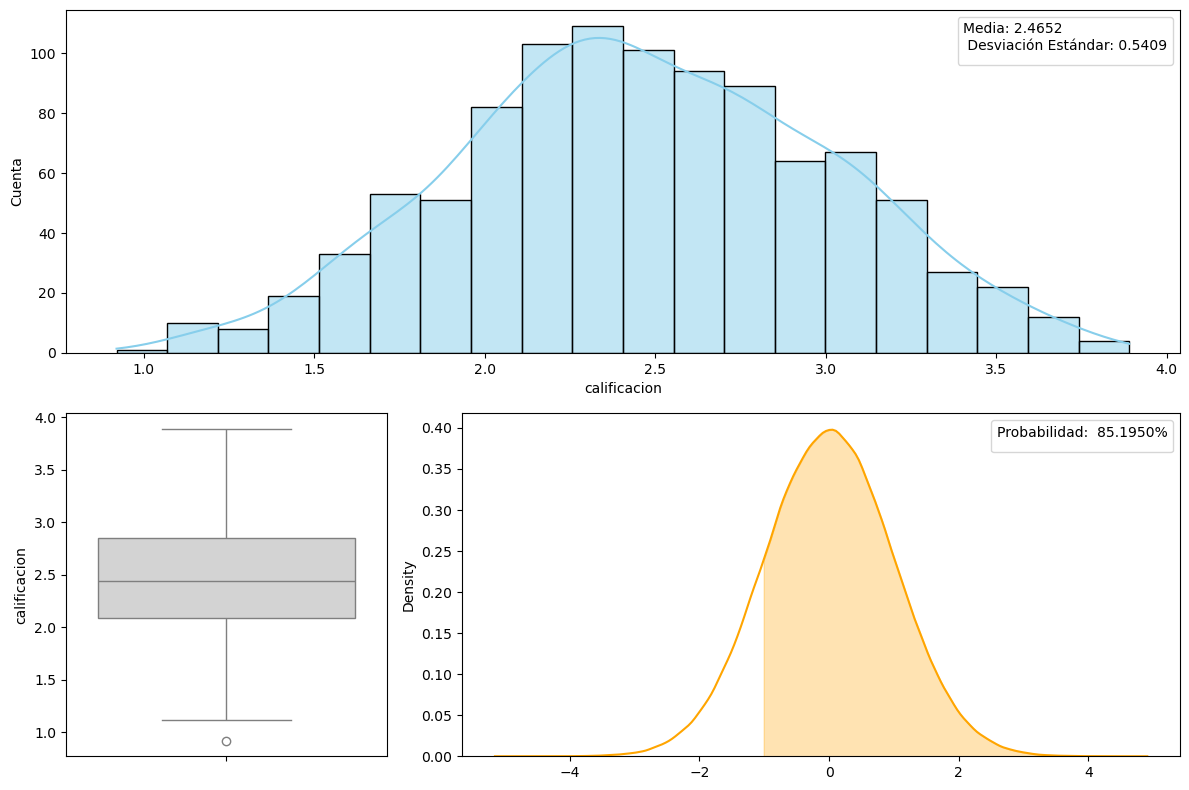

In [156]:
get_figures(banana['calificacion'], nombre='3_Calificacion_banana', rango=[1.9,'inf'])

## Indice de madurez - experimento 4

/tmp/ipykernel_50154/27943055.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=f'Media: {media:.4f} \n Desviación Estándar: {std:.4f}', loc='upper right')
/tmp/ipykernel_50154/27943055.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title = f'Probabilidad: {prob * 100: 0.4f}%')


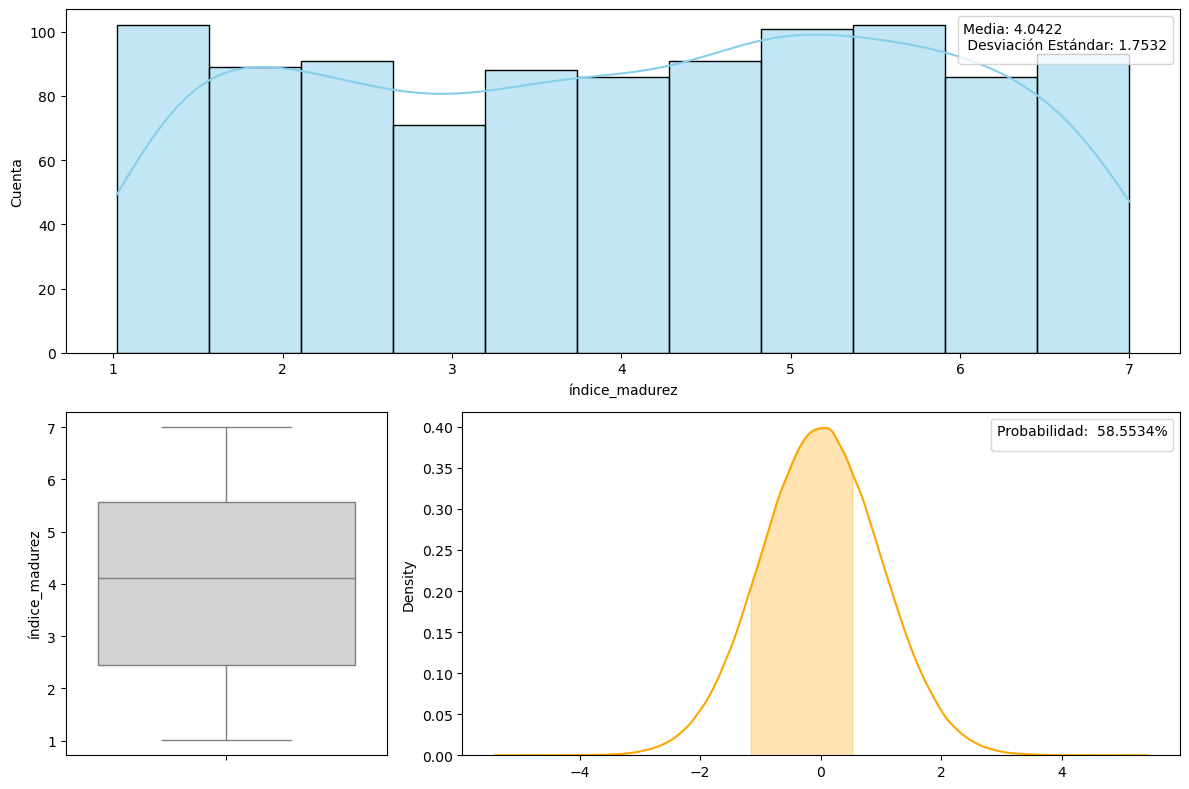

In [157]:
get_figures(banana['índice_madurez'], nombre='4_Indice_madurez_banana', rango=[2,5])

## Indice Briz de azucar - experimento 5

/tmp/ipykernel_50154/27943055.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=f'Media: {media:.4f} \n Desviación Estándar: {std:.4f}', loc='upper right')
/tmp/ipykernel_50154/27943055.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title = f'Probabilidad: {prob * 100: 0.4f}%')


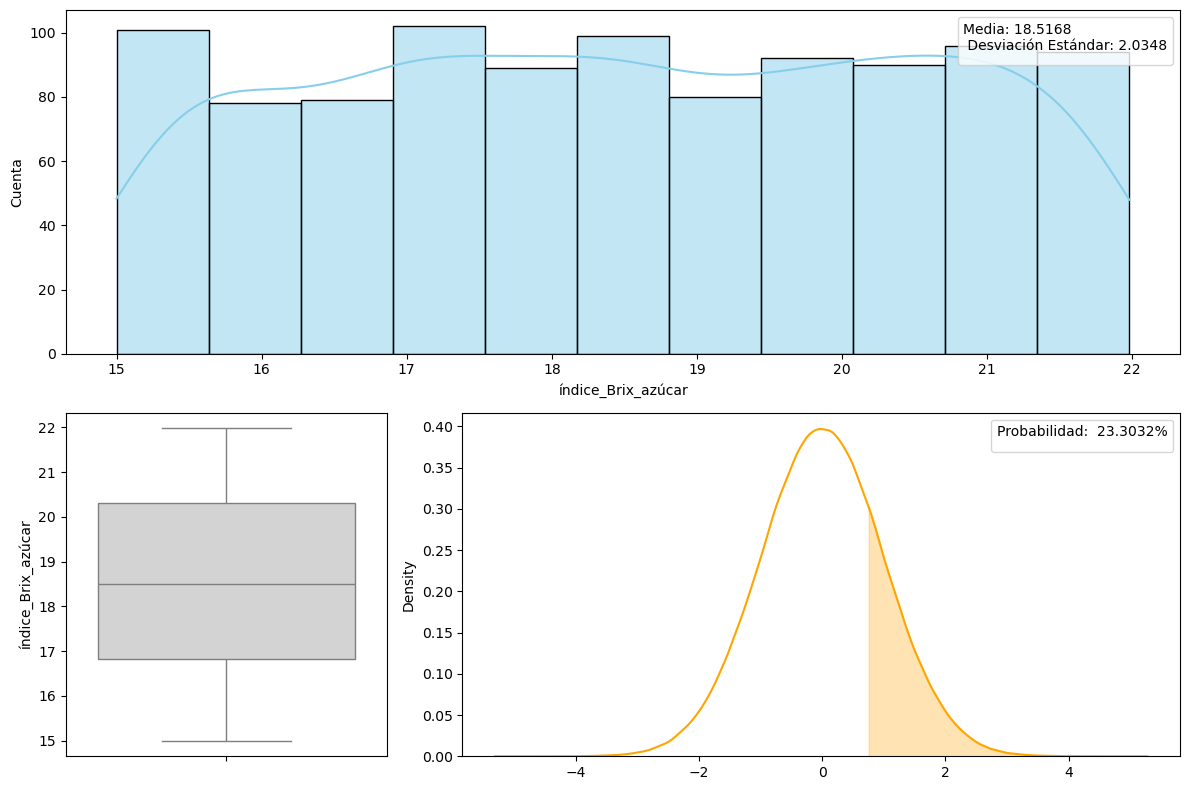

In [158]:
get_figures(banana['índice_Brix_azúcar'], nombre = '5_Indice_azucar_banana', rango=[20, 'inf'])

## Peso banana - experimento 6

/tmp/ipykernel_50154/27943055.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=f'Media: {media:.4f} \n Desviación Estándar: {std:.4f}', loc='upper right')
/tmp/ipykernel_50154/27943055.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title = f'Probabilidad: {prob * 100: 0.4f}%')


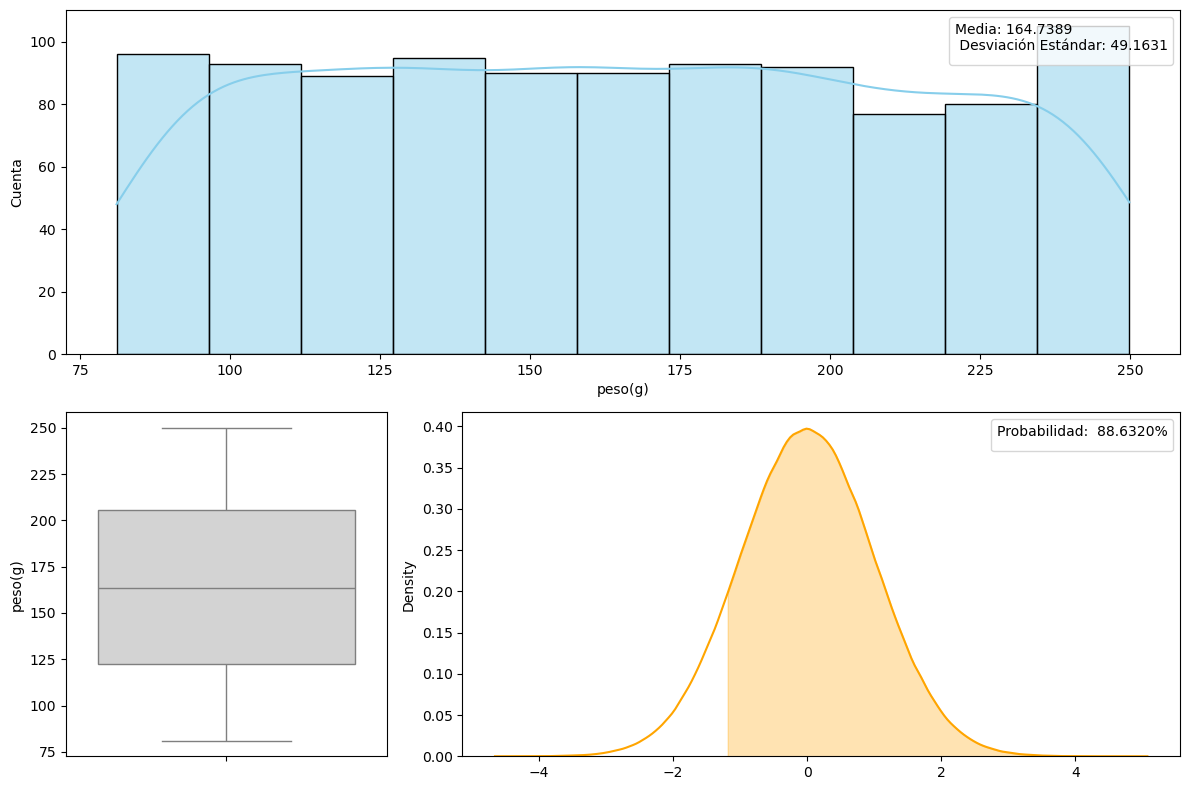

In [159]:
get_figures(banana['peso(g)'], nombre = '6_Peso_banana', rango=[105.39, 'inf'])

## Edad arbol banana - experimento 7

/tmp/ipykernel_50154/27943055.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=f'Media: {media:.4f} \n Desviación Estándar: {std:.4f}', loc='upper right')
/tmp/ipykernel_50154/27943055.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title = f'Probabilidad: {prob * 100: 0.4f}%')


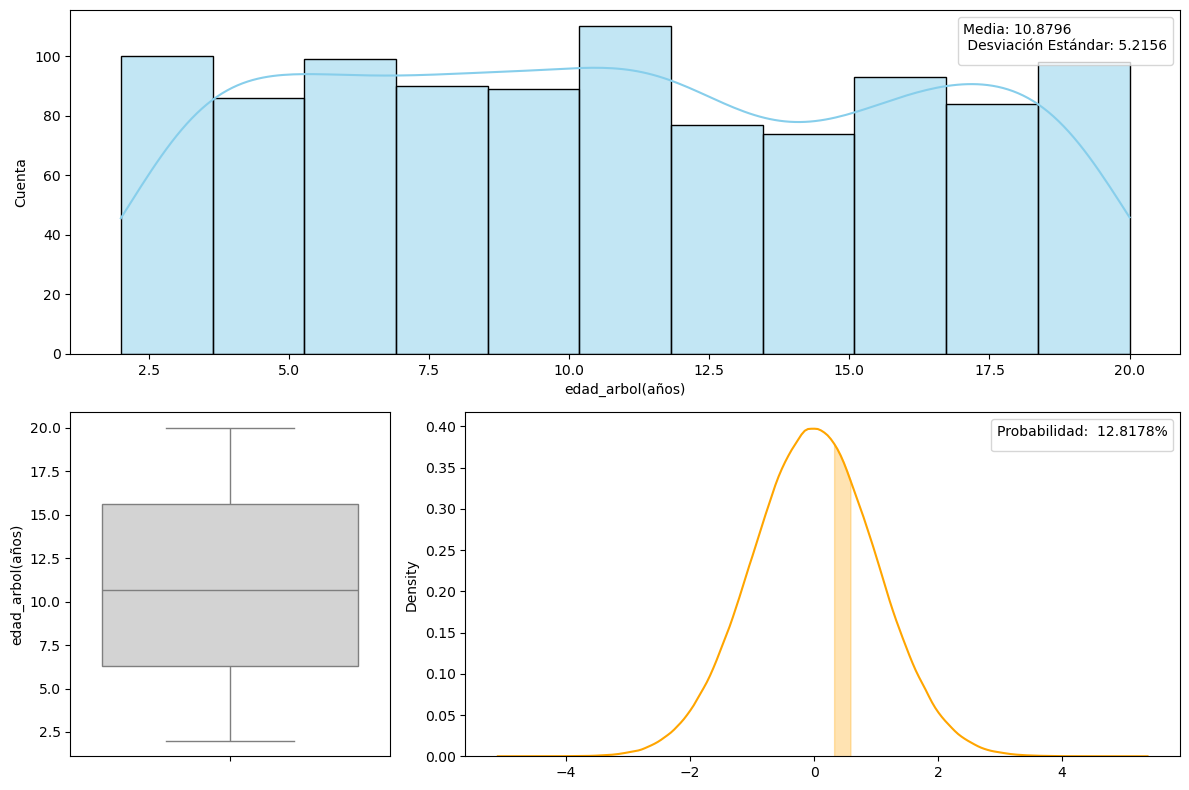

In [160]:
get_figures(banana['edad_arbol(años)'], nombre = '7_Edad_arbol_banana', rango=[12.34,14.21])

## Altitud banana - experimento 8

/tmp/ipykernel_50154/27943055.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=f'Media: {media:.4f} \n Desviación Estándar: {std:.4f}', loc='upper right')
/tmp/ipykernel_50154/27943055.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title = f'Probabilidad: {prob * 100: 0.4f}%')


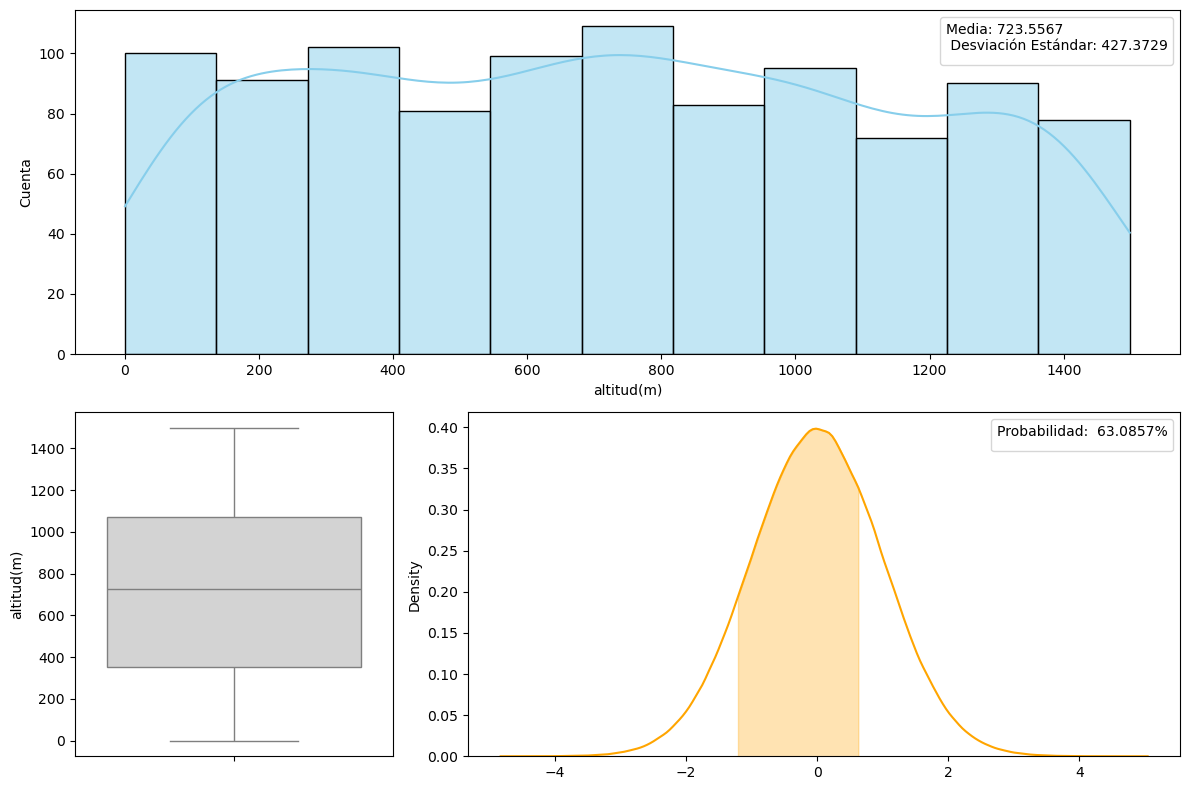

In [161]:
get_figures(banana['altitud(m)'], nombre = '8_Altitud_banana', rango=[200, 1000])

## Lluvia banana - experimento 9

/tmp/ipykernel_50154/27943055.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=f'Media: {media:.4f} \n Desviación Estándar: {std:.4f}', loc='upper right')
/tmp/ipykernel_50154/27943055.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title = f'Probabilidad: {prob * 100: 0.4f}%')


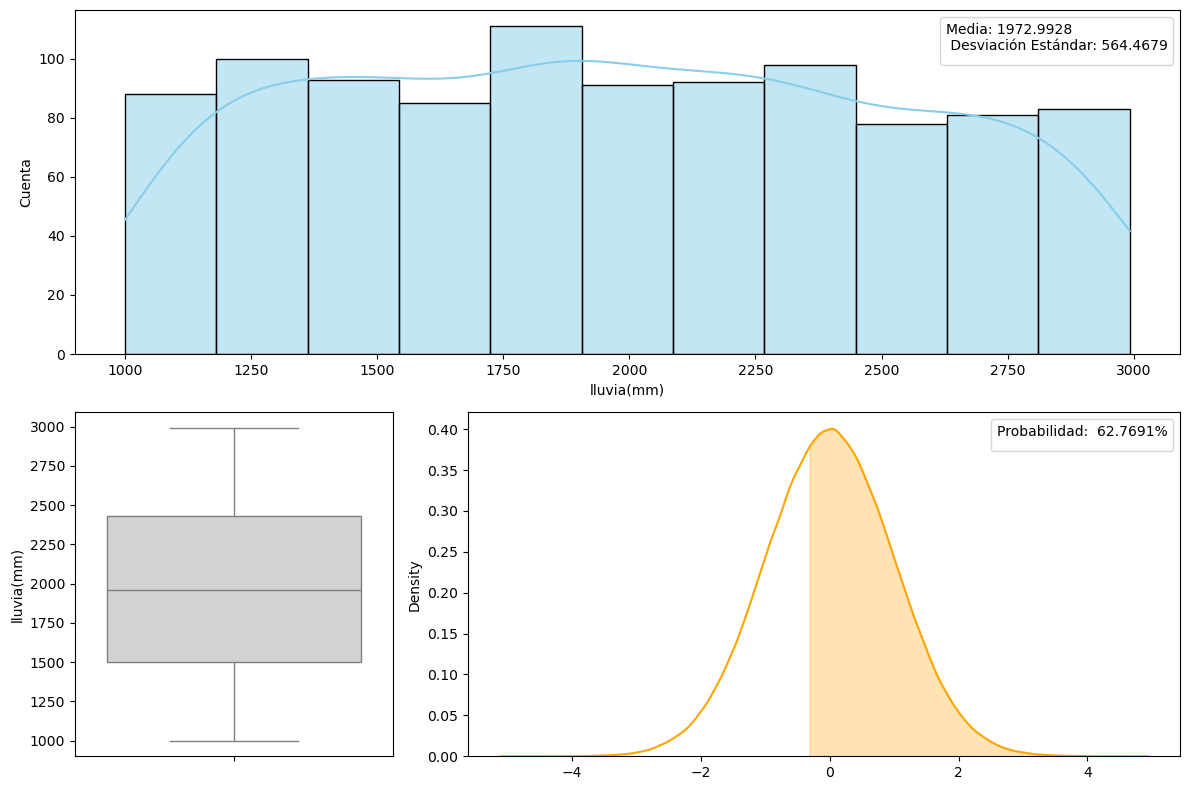

In [162]:
get_figures(banana['lluvia(mm)'], nombre = '9_Lluvia_banana', rango=[1789.12, 'inf'])

## Nitrogeno en suelo - experimento 10

/tmp/ipykernel_50154/27943055.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=f'Media: {media:.4f} \n Desviación Estándar: {std:.4f}', loc='upper right')
/tmp/ipykernel_50154/27943055.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title = f'Probabilidad: {prob * 100: 0.4f}%')


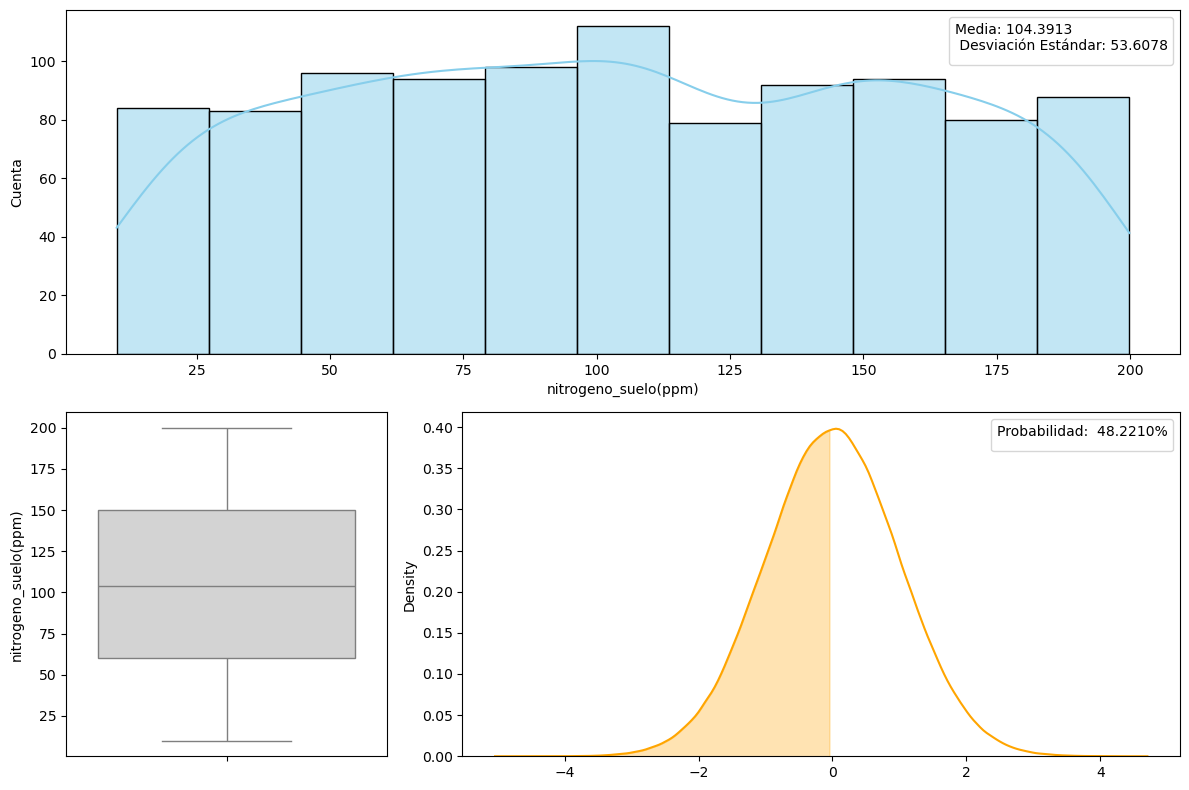

In [163]:
get_figures(banana['nitrogeno_suelo(ppm)'], nombre = '10_Nitrogeno_banana', rango=['inf', 102])

## Firmeza banana - expermento 11

/tmp/ipykernel_50154/27943055.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=f'Media: {media:.4f} \n Desviación Estándar: {std:.4f}', loc='upper right')
/tmp/ipykernel_50154/27943055.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title = f'Probabilidad: {prob * 100: 0.4f}%')


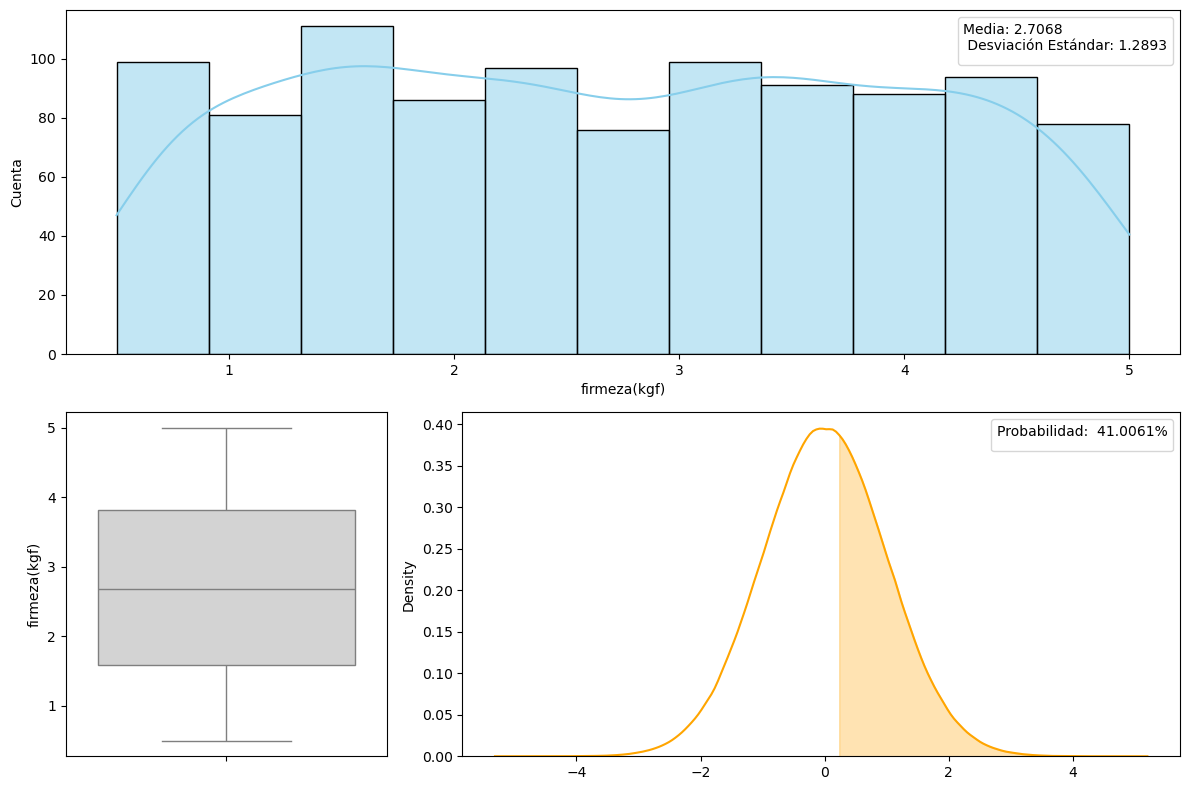

In [164]:
get_figures(banana['firmeza(kgf)'], nombre = '6_firmeza_banana', rango=[3, 'inf'])

# Tortilla prices

In [ ]:
nombre = 'tortilla_prices'
tortilla = pd.read_csv(path_datasets + nombre +'.csv')
tortilla.dropna(inplace = True)
tortilla.rename(columns={'Price per kilogram':'Precio por kg'}, inplace=True)
tortilla

0.0

## Precio tortilla - experimento 12

/tmp/ipykernel_50154/27943055.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=f'Media: {media:.4f} \n Desviación Estándar: {std:.4f}', loc='upper right')
/tmp/ipykernel_50154/27943055.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title = f'Probabilidad: {prob * 100: 0.4f}%')


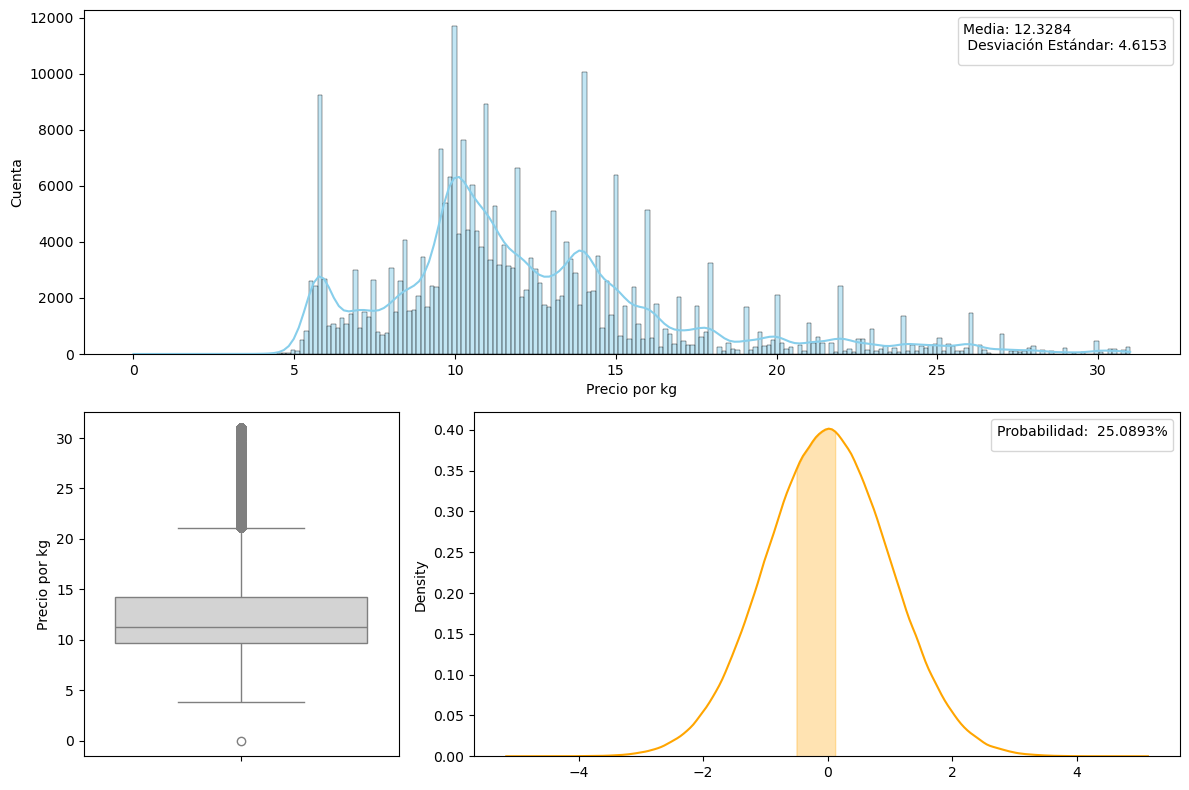

In [166]:
get_figures(tortilla['Precio por kg'], nombre = '12_precio_tortilla', rango=[10,13])

# Food and nutrition

In [167]:
nombre = 'Food_and_Nutrition'
food_nutrition = pd.read_csv(path_datasets + nombre +'.csv')
food_nutrition.drop(columns=['Ages',
                     'Gender',
                     'Dietary Preference',
                     'Activity Level',
                     'Breakfast Suggestion',
                     'Lunch Suggestion',
                     'Dinner Suggestion',
                     'Snack Suggestion',
                     'Disease',
                     'Weight',
                     'Height',
                     'Daily Calorie Target'], inplace = True)

food_nutrition.rename(columns={'Protein':'Proteinas(g)',
                       'Sugar': 'Azucar(g)',
                       'Sodium':'Sodio(mg)',
                       'Calories': 'Calorias',
                       'Carbohydrates': 'Carbohidratos(g)',
                       'Fiber':'Fibra(g)',
                       'Fat':'Grasa(g)'}, inplace = True)

food_nutrition

,Proteinas(g),Azucar(g),Sodio(mg),Calorias,Carbohidratos(g),Fibra(g),Grasa(g)
0,120,125.0,24.0,2020,250,30.00,60
1,80,100.0,16.0,1480,200,24.00,40
2,100,150.0,20.0,2185,300,36.00,65
3,140,175.0,28.0,2680,350,42.00,80
4,80,125.0,16.0,1815,250,30.00,55
...,...,...,...,...,...,...,...
1693,94,63.0,18.8,1258,126,15.12,42
1694,158,105.0,31.6,2102,210,25.20,70
1695,191,127.5,38.2,2549,255,30.60,85
1696,249,166.0,49.8,3314,332,39.84,110


## Azucar food - experimento 13

/tmp/ipykernel_50154/27943055.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=f'Media: {media:.4f} \n Desviación Estándar: {std:.4f}', loc='upper right')
/tmp/ipykernel_50154/27943055.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title = f'Probabilidad: {prob * 100: 0.4f}%')


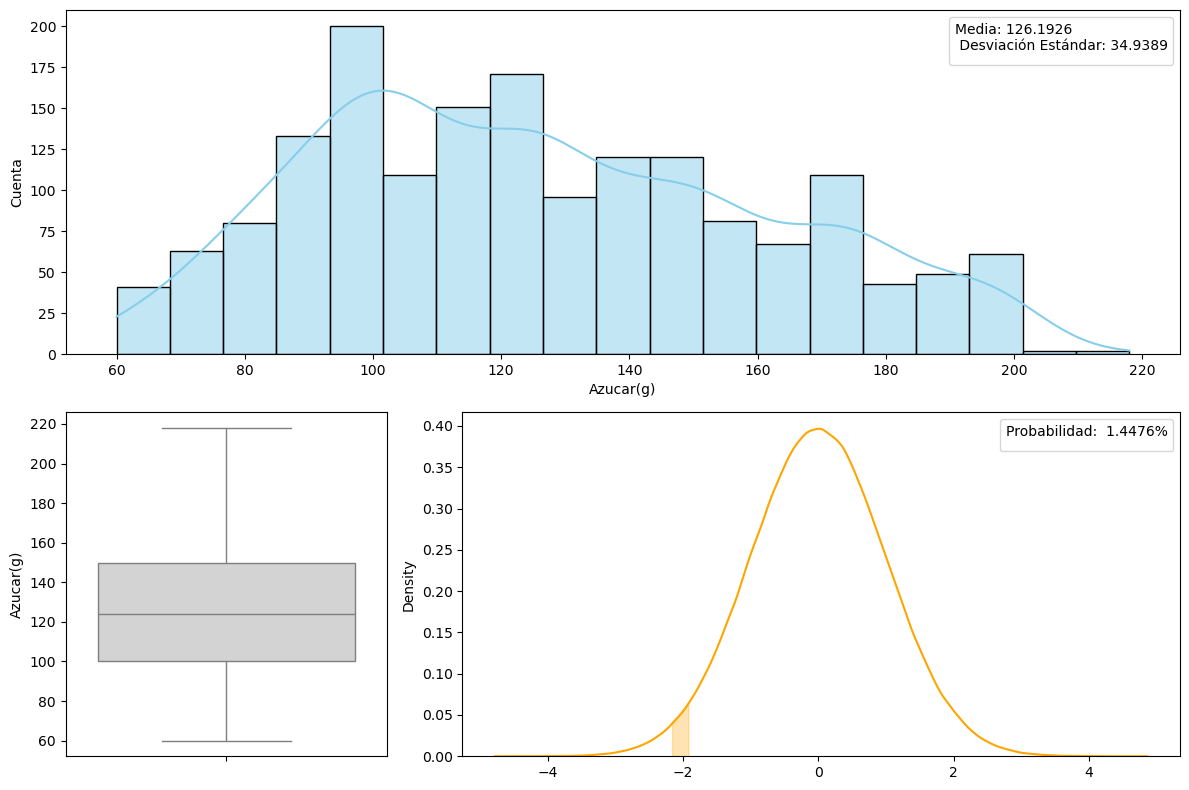

In [168]:
get_figures(food_nutrition['Azucar(g)'], nombre='13_azucar_nutricion', rango=[50,60])

## Calorias food - experimento 14

/tmp/ipykernel_50154/27943055.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=f'Media: {media:.4f} \n Desviación Estándar: {std:.4f}', loc='upper right')
/tmp/ipykernel_50154/27943055.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title = f'Probabilidad: {prob * 100: 0.4f}%')


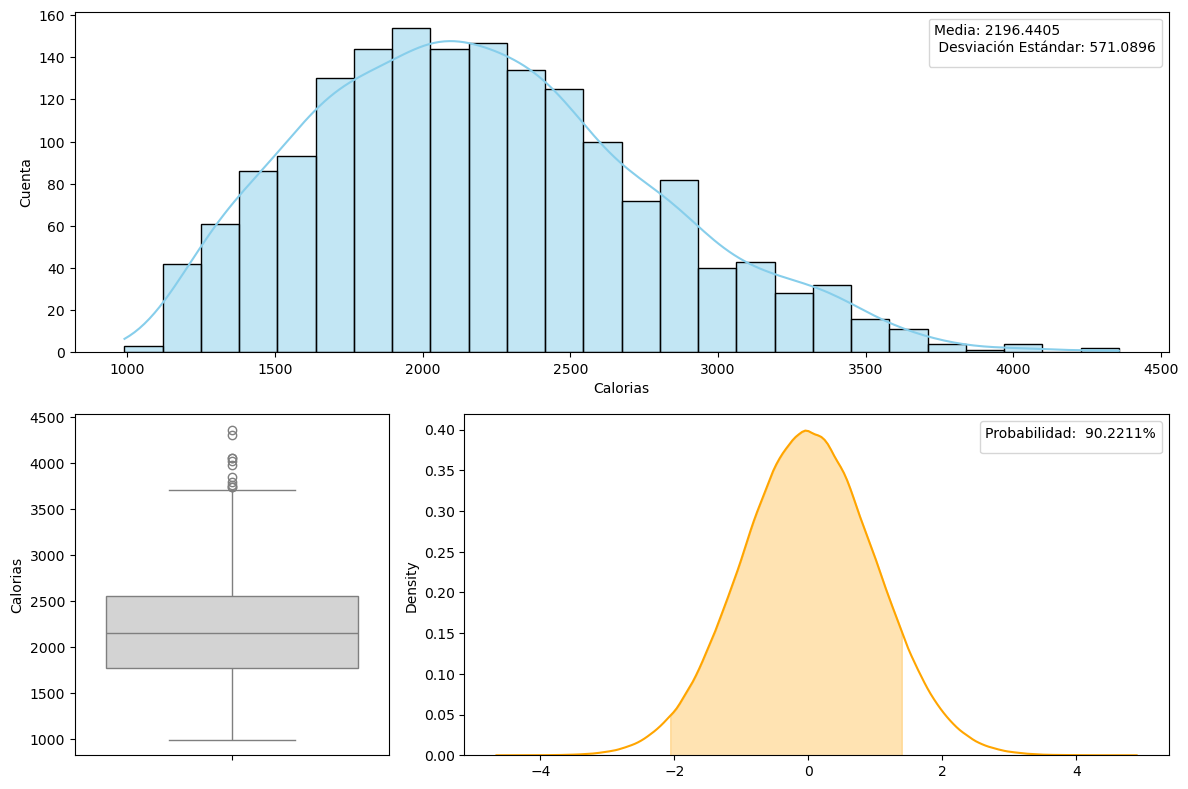

In [169]:
get_figures(food_nutrition['Calorias'], nombre='14_calorias_nutricion', rango=[1000,3000])

## Carbogidratos food - experimento 15

/tmp/ipykernel_50154/27943055.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=f'Media: {media:.4f} \n Desviación Estándar: {std:.4f}', loc='upper right')
/tmp/ipykernel_50154/27943055.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title = f'Probabilidad: {prob * 100: 0.4f}%')


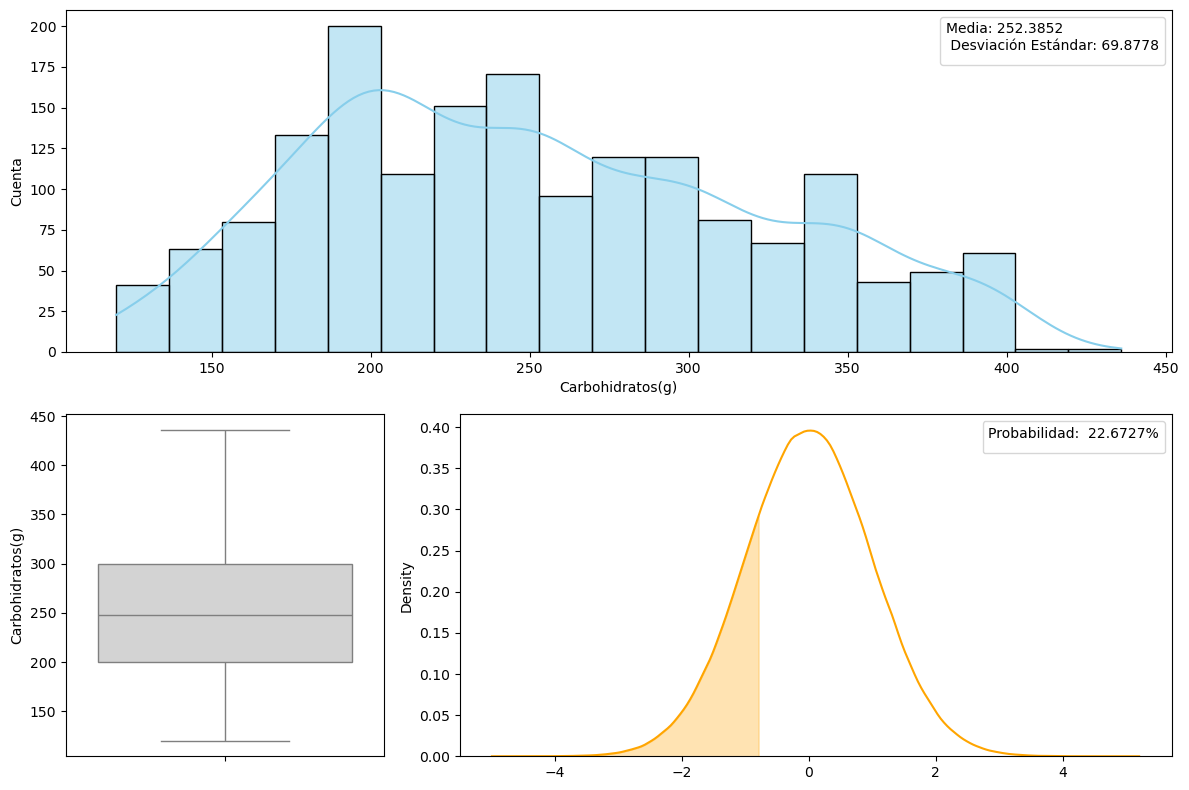

In [170]:
get_figures(food_nutrition['Carbohidratos(g)'], nombre='15_carbohidratos_nutricion', rango=['inf', 200])

## Fibra food -experimento 16

/tmp/ipykernel_50154/27943055.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=f'Media: {media:.4f} \n Desviación Estándar: {std:.4f}', loc='upper right')
/tmp/ipykernel_50154/27943055.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title = f'Probabilidad: {prob * 100: 0.4f}%')


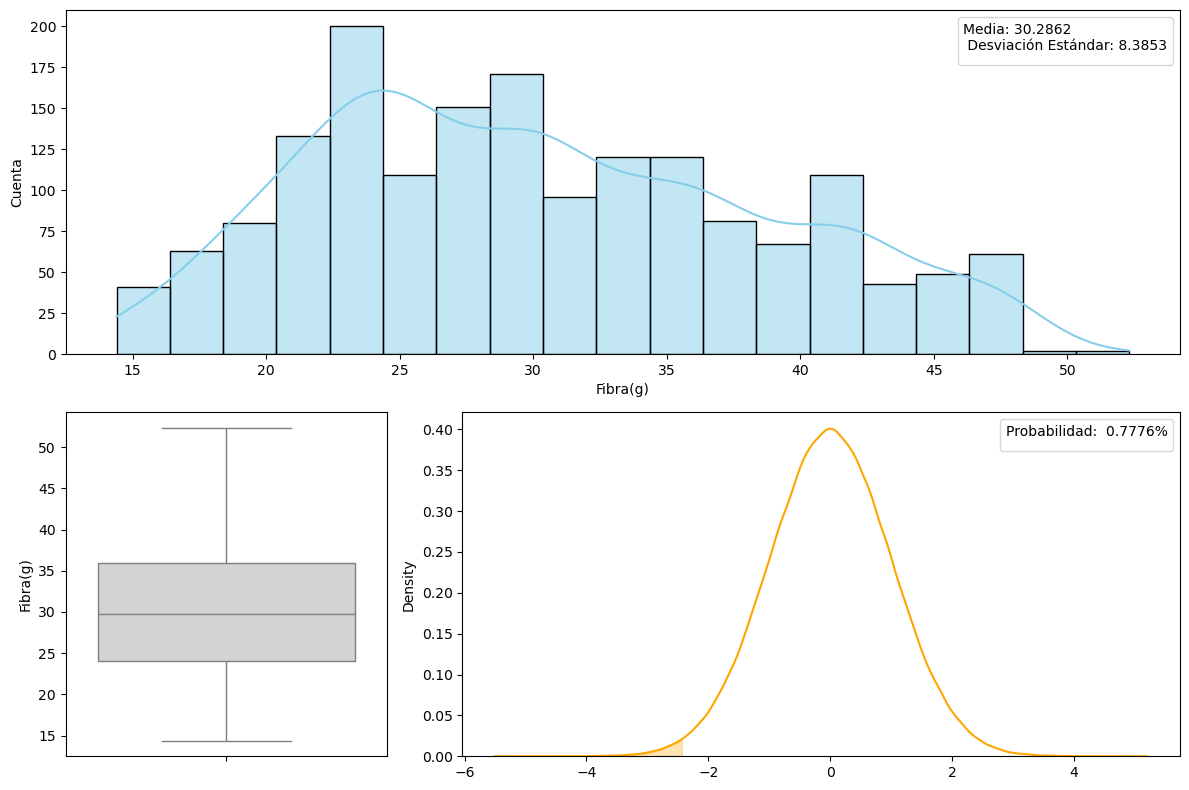

In [171]:
get_figures(food_nutrition['Fibra(g)'], nombre='16_fibra_nutricion', rango=['inf', 10])

## Grasa food -experimento 17

/tmp/ipykernel_50154/27943055.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=f'Media: {media:.4f} \n Desviación Estándar: {std:.4f}', loc='upper right')
/tmp/ipykernel_50154/27943055.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title = f'Probabilidad: {prob * 100: 0.4f}%')


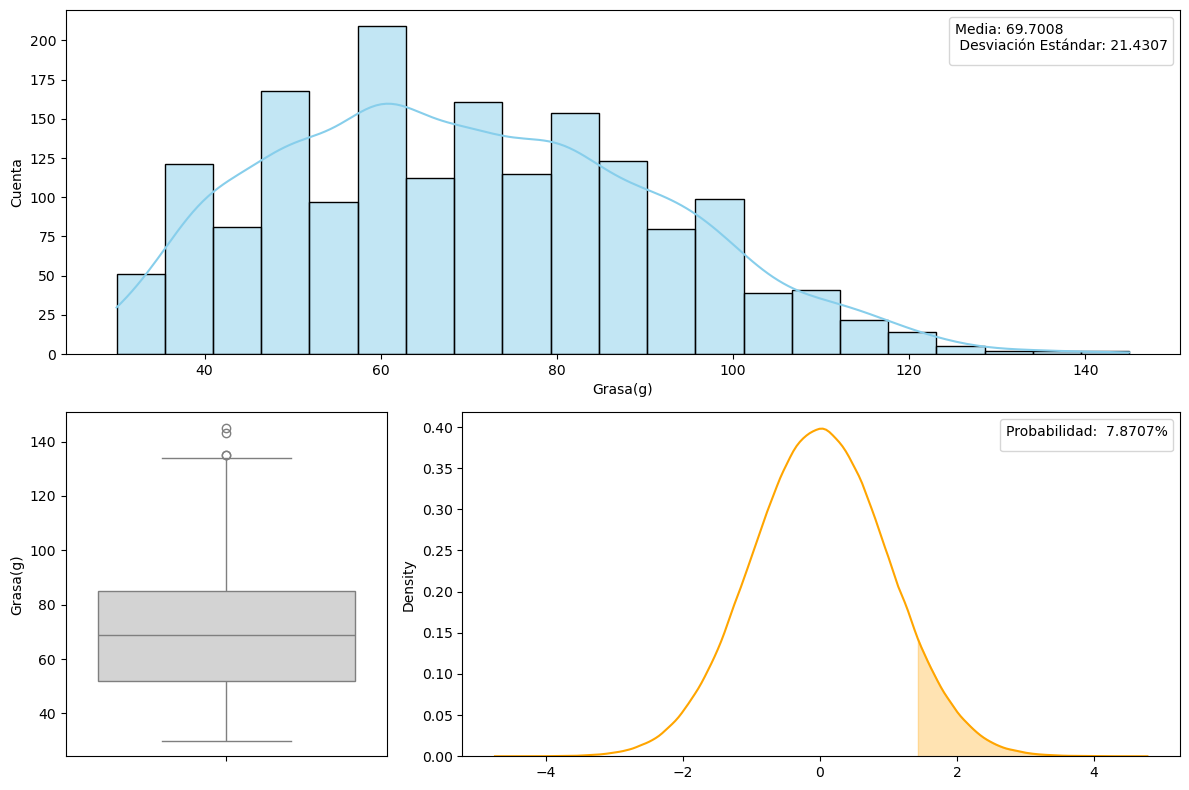

In [172]:
get_figures(food_nutrition['Grasa(g)'], nombre='17_grasa_nutricion', rango=[100, 'inf'])

## Proteinas food - experimento 18

/tmp/ipykernel_50154/27943055.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=f'Media: {media:.4f} \n Desviación Estándar: {std:.4f}', loc='upper right')
/tmp/ipykernel_50154/27943055.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title = f'Probabilidad: {prob * 100: 0.4f}%')


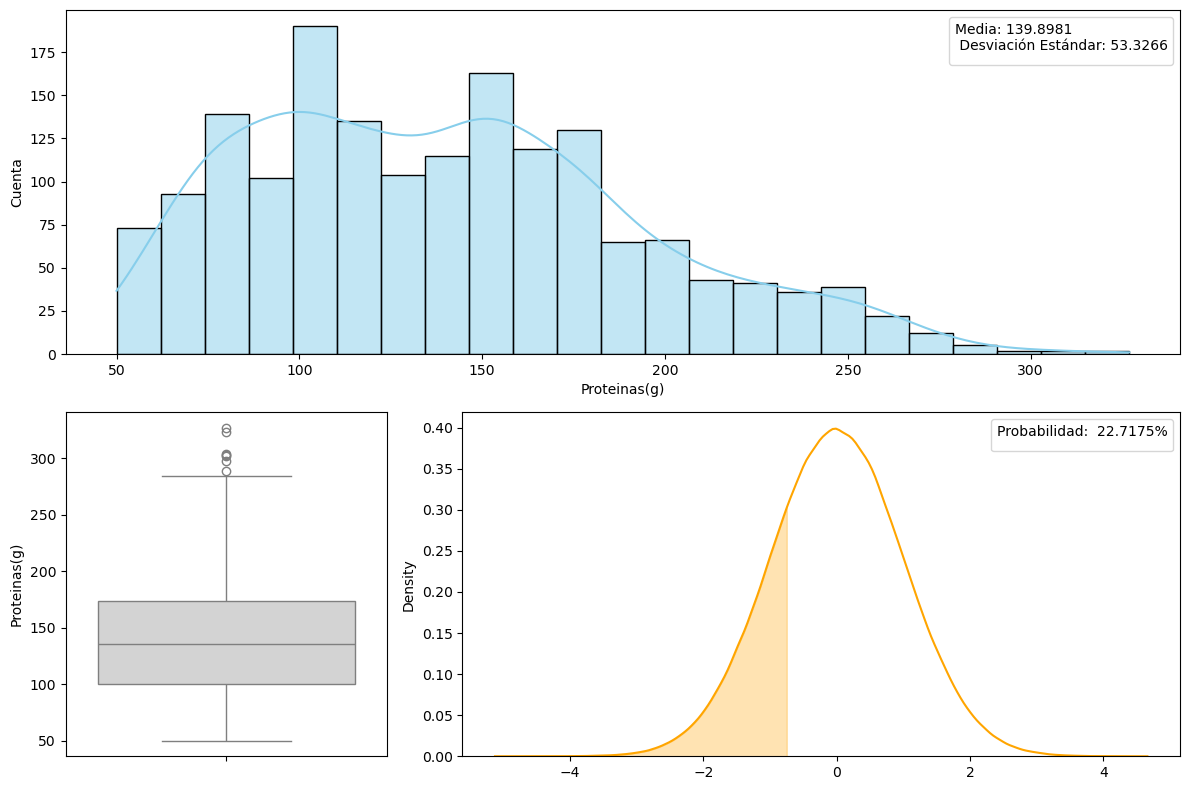

In [173]:
get_figures(food_nutrition['Proteinas(g)'], nombre='18_proteinas_nutricion', rango=['inf', 100])

## Sodio food - experimento 19

/tmp/ipykernel_50154/27943055.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=f'Media: {media:.4f} \n Desviación Estándar: {std:.4f}', loc='upper right')
/tmp/ipykernel_50154/27943055.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title = f'Probabilidad: {prob * 100: 0.4f}%')


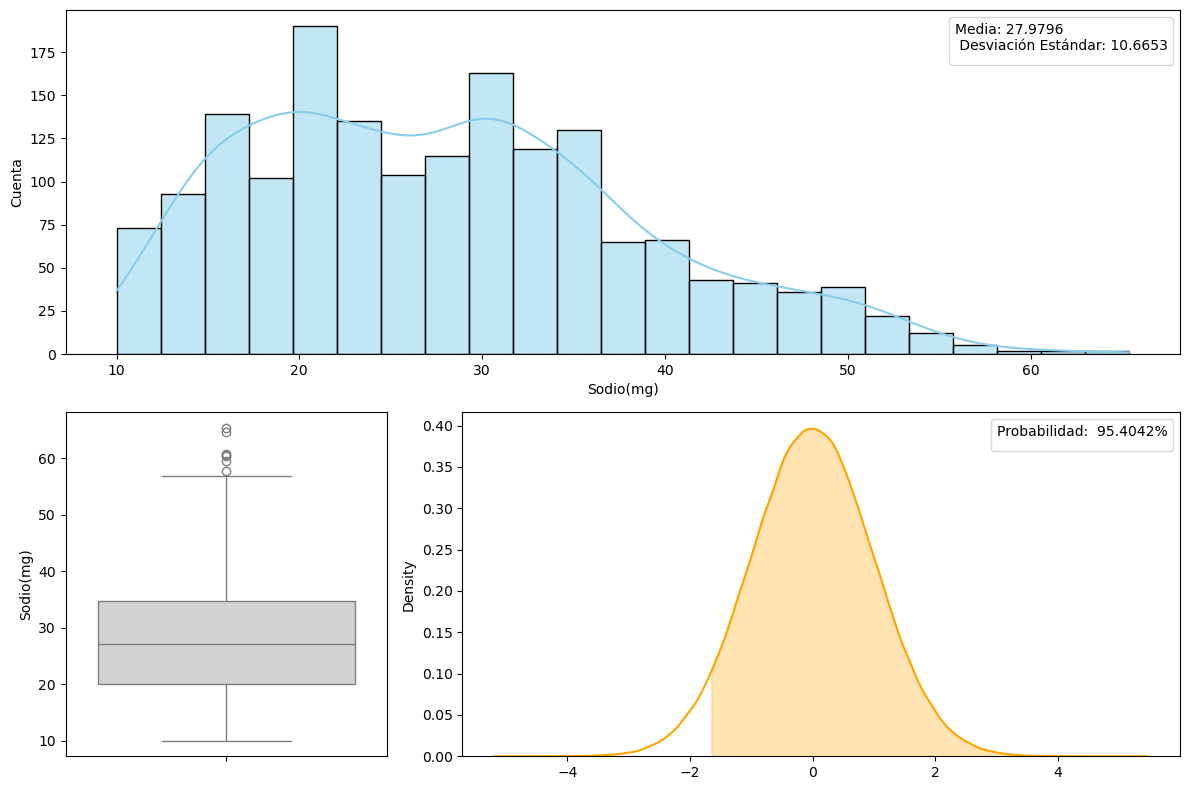

In [174]:
get_figures(food_nutrition['Sodio(mg)'], nombre='19_sodio_nutricion', rango=[10, 70])

# Plant health

In [175]:
nombre = 'plant_health'
plant = pd.read_csv(path_datasets + nombre + '.csv')
plant.rename(columns={'Electrochemical_Signal':'Senal electroquimica'}, inplace = True)
plant

,Timestamp,Plant_ID,Soil_Moisture,Ambient_Temperature,Soil_Temperature,Humidity,Light_Intensity,Soil_pH,Nitrogen_Level,Phosphorus_Level,Potassium_Level,Chlorophyll_Content,Senal electroquimica,Plant_Health_Status
0,2024-10-03 10:54:53.407995,1,27.521109,22.240245,21.900435,55.291904,556.172805,5.581955,10.003650,45.806852,39.076199,35.703006,0.941402,High Stress
1,2024-10-03 16:54:53.407995,1,14.835566,21.706763,18.680892,63.949181,596.136721,7.135705,30.712562,25.394393,17.944826,27.993296,0.164899,High Stress
2,2024-10-03 22:54:53.407995,1,17.086362,21.180946,15.392939,67.837956,591.124627,5.656852,29.337002,27.573892,35.706530,43.646308,1.081728,High Stress
3,2024-10-04 04:54:53.407995,1,15.336156,22.593302,22.778394,58.190811,241.412476,5.584523,16.966621,26.180705,26.257746,37.838095,1.186088,High Stress
4,2024-10-04 10:54:53.407995,1,39.822216,28.929001,18.100937,63.772036,444.493830,5.919707,10.944961,37.898907,37.654483,48.265812,1.609805,High Stress
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,2024-11-01 04:54:53.493508,10,29.665780,27.605285,15.381699,54.668196,650.536854,5.715289,29.993107,14.914470,21.560747,24.273224,0.714553,Moderate Stress
1196,2024-11-01 10:54:53.493508,10,15.490782,22.108112,15.221033,61.243143,768.760787,5.958957,45.258678,25.216248,31.940717,30.930676,1.448029,High Stress
1197,2024-11-01 16:54:53.493508,10,23.495723,21.680240,15.499764,40.693671,293.643366,7.419157,38.351189,48.656078,28.473233,38.324484,0.880019,Moderate Stress
1198,2024-11-01 22:54:53.493508,10,30.971675,23.019488,21.934918,41.387107,492.952014,5.855767,49.402550,23.843971,19.750042,46.027529,0.344597,Healthy


## Senal electroquimica - experimento 20

/tmp/ipykernel_50154/27943055.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=f'Media: {media:.4f} \n Desviación Estándar: {std:.4f}', loc='upper right')
/tmp/ipykernel_50154/27943055.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title = f'Probabilidad: {prob * 100: 0.4f}%')


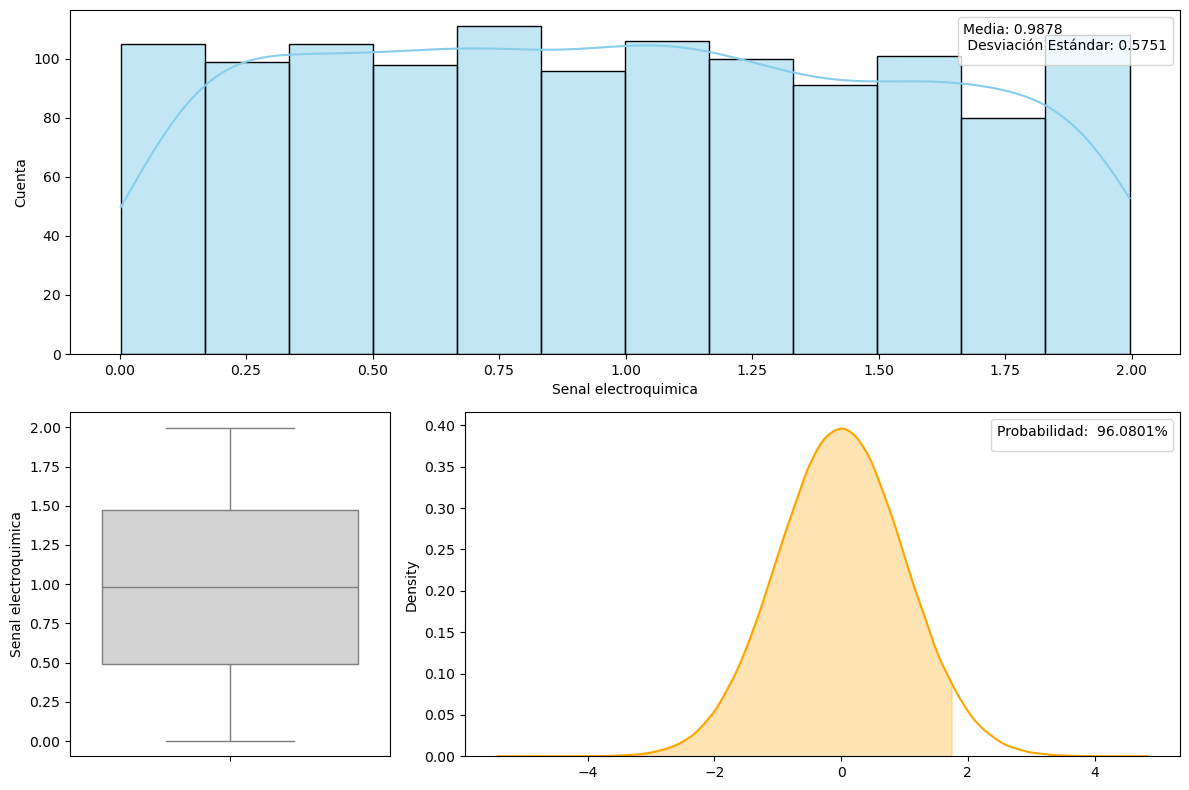

In [176]:
get_figures(plant['Senal electroquimica'], nombre='20_senal_planta', rango=['inf', 2])

# User behavior

In [177]:
nombre = 'user_behavior'

In [178]:
user_behavior = pd.read_csv(path_datasets + nombre +'.csv')
user_behavior

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
...,...,...,...,...,...,...,...,...,...,...,...
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1


# Water quality

In [179]:
nombre = 'water_quality'

In [180]:
water = pd.read_csv(path_datasets + nombre + '.csv')
water


,Geographical Location (Latitude),Geographical Location (Longitude),Sampling Date,Nitrogen (mg/L),Phosphorus (mg/L),State of Sewage System
0,5.201086,-55.029673,2022-06-10,7.181860,2.320506,Good
1,-64.196408,94.483268,2018-10-12,9.735685,1.015308,Good
2,-7.892940,-90.503109,2023-02-16,6.778074,4.718452,Good
3,-11.334248,110.778986,2021-10-17,3.340601,3.315705,Moderate
4,-24.532061,-147.588402,2021-12-01,8.753211,4.682091,Good
...,...,...,...,...,...,...
40075,32.173429,121.459362,2017-03-11,6.765070,0.692772,Moderate
40076,-44.355125,-35.739953,2015-05-16,6.955335,2.917616,Moderate
40077,-82.957382,177.979361,2020-08-30,8.714242,1.683240,Poor
40078,-17.483532,25.092800,2018-12-13,0.739058,0.225967,Good
